In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df1= pd.read_csv("application_data.csv")

In [4]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df2=pd.read_csv("previous_application.csv")

In [6]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df1.shape,df2.shape

((307511, 122), (1670214, 37))

In [8]:
df1.describe(include=[int,float])

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,104582.000000,307509.000000,134133.000000,3.068510e+05,...,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-4986.120328,12.061091,2.152665,0.502130,5.143927e-01,...,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,3522.886321,11.944812,0.910682,0.211062,1.910602e-01,...,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-24672.000000,0.000000,1.000000,0.014568,8.173617e-08,...,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-7479.500000,5.000000,2.000000,0.334007,3.924574e-01,...,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-4504.000000,9.000000,2.000000,0.505998,5.659614e-01,...,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-2010.000000,15.000000,3.000000,0.675053,6.636171e-01,...,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,0.000000,91.000000,20.000000,0.962693,8.549997e-01,...,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
df2.describe(include=[int,float])

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,774370.000000,5951.000000,5951.000000,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,0.079637,0.188357,0.773503,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,0.107823,0.087671,0.100879,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,-0.000015,0.034781,0.373150,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,0.000000,0.160716,0.715645,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,0.051605,0.189122,0.835095,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,0.108909,0.193330,0.852537,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,1.000000,1.000000,1.000000,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [10]:
additional_col=[]
common_col=[]

for col in df1.columns:
    if col not in df2.columns:
        additional_col.append(col)
    else:
         common_col.append(col)
print(len(additional_col))
print(len(common_col))
print(common_col)
#print(additional_col)

114
8
['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']


In [11]:
pd.options.display.max_rows=307511
missing_percent = 100*df1.isnull().sum()/len(df1)
missing_percent

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [12]:
df1.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [13]:
# drop the columns having nann values greater than 50000
for i in df1:
    if sum(df1[i].isnull())>50000:
        df1.drop(i, axis=1, inplace=True)

In [14]:
df1.shape

(307511, 71)

In [15]:
# Dropped some columns find not much useful. it could be useful from hypothesis generation point of view.

df3 = df1.drop(columns=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8',                   
'FLAG_DOCUMENT_9',                   
'FLAG_DOCUMENT_10',                  
'FLAG_DOCUMENT_11',                  
'FLAG_DOCUMENT_12',                  
'FLAG_DOCUMENT_13',                  
'FLAG_DOCUMENT_14',                  
'FLAG_DOCUMENT_15',                  
'FLAG_DOCUMENT_16',                  
'FLAG_DOCUMENT_17',                  
'FLAG_DOCUMENT_18',                  
'FLAG_DOCUMENT_19',                   
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21' ],inplace = True)

In [16]:
df1.drop(columns=['EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE',        
'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',        
'DEF_60_CNT_SOCIAL_CIRCLE'],inplace= True)

In [17]:
df1.shape

(307511, 46)

In [18]:
df1.select_dtypes(include=['float64','int64']).dtypes

SK_ID_CURR                       int64
TARGET                           int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY   

In [19]:
## filled the missing values if numeric values(INT,FLOAT) filled with mean values 
## if values are categorical; then filled with mode values in the application data
mean_values = df1[['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE',
                   'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                  'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
                  'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']].mean()

In [20]:
mean_values

AMT_ANNUITY                    27108.573909
AMT_GOODS_PRICE               538396.207429
CNT_FAM_MEMBERS                    2.152665
DAYS_LAST_PHONE_CHANGE          -962.858788
AMT_REQ_CREDIT_BUREAU_WEEK         0.034362
AMT_REQ_CREDIT_BUREAU_MON          0.267395
AMT_REQ_CREDIT_BUREAU_QRT          0.265474
AMT_REQ_CREDIT_BUREAU_YEAR         1.899974
AMT_REQ_CREDIT_BUREAU_DAY          0.007000
AMT_REQ_CREDIT_BUREAU_HOUR         0.006402
dtype: float64

In [21]:
df2 = df1.fillna(value=mean_values, inplace=True)

In [22]:
df1.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS             

In [23]:
df1.select_dtypes(include=['object']).dtypes

NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
WEEKDAY_APPR_PROCESS_START    object
ORGANIZATION_TYPE             object
dtype: object

In [24]:
df1['NAME_TYPE_SUITE']=df1['NAME_TYPE_SUITE'].fillna(df1['NAME_TYPE_SUITE'].mode()[0])

In [25]:
df1.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

In [26]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AM

In [27]:
df1.select_dtypes(include=['float64','int64']).dtypes

SK_ID_CURR                       int64
TARGET                           int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY   

In [28]:
## segmenting variables into groups

customer_personal = ['SK_ID_CURR','CNT_CHILDREN','DAYS_BIRTH','FLAG_MOBIL','FLAG_PHONE','CNT_FAM_MEMBERS',
                     'DAYS_LAST_PHONE_CHANGE','REG_CITY_NOT_LIVE_CITY','REG_REGION_NOT_LIVE_REGION',
                     'REGION_POPULATION_RELATIVE']
customer_work_related = ['AMT_INCOME_TOTAL','DAYS_EMPLOYED','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_EMAIL',
                        'LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_WORK_CITY','FLAG_CONT_MOBILE',
                        'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION', 'AMT_ANNUITY']
loan_related_details = ['AMT_CREDIT','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH','REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','AMT_REQ_CREDIT_BUREAU_HOUR',     
                        'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',      
                        'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'] 

In [29]:
def UVA_outliers(df1, var_group):
    size=len(var_group)
    plt.figure(figsize=(7*size,5), dpi=200)
    for j,i in enumerate(var_group):
        quant25 = df1[i].quantile(0.25)
        quant75 = df1[i].quantile(0.75)
        IQR = quant75- quant25
        med = df1[i].median()
        whisk_low = med-(1.5*IQR)
        whisk_high = med+(1.5*IQR)
        Outlier_high = len(df1[i][df1[i]>whisk_high])
        outlier_low = len(df1[i][df1[i]<whisk_low])
        
        plt.subplot(1, size,j+1)
        sns.boxplot(df1[i])
        plt.ylabel =('{}',format(i))
    
            
            
        
    

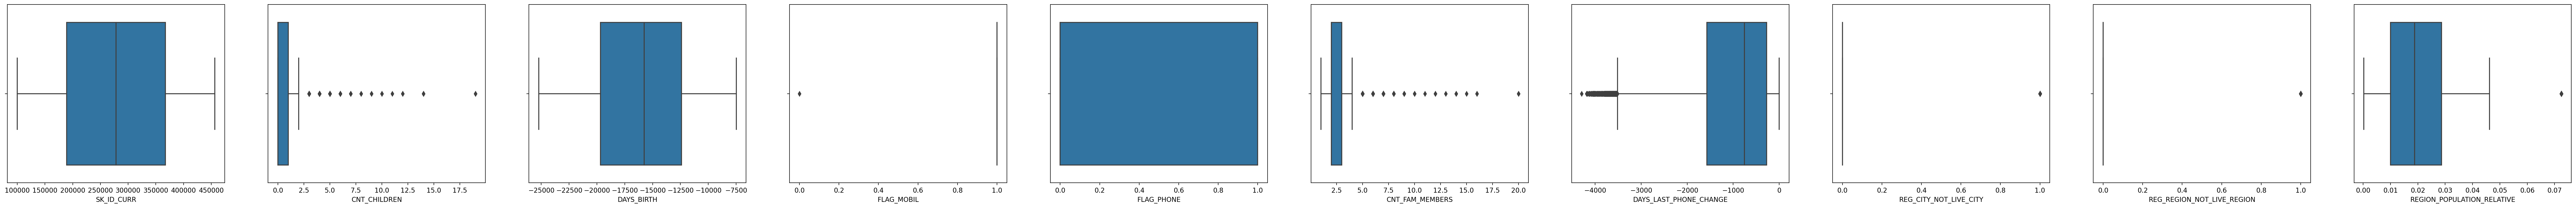

In [30]:
UVA_outliers(df1,customer_personal)

In [31]:
## in CNT_CHILDREN there are some small values seems extreme outliers
## in DAys_last_phone_change some outlier values are present like -ve values


In [32]:
df1['DAYS_LAST_PHONE_CHANGE'].value_counts()


 0.000000       37672
-1.000000        2812
-2.000000        2318
-3.000000        1763
-4.000000        1285
-5.000000         824
-6.000000         537
-7.000000         442
-8.000000         278
-476.000000       222
-352.000000       213
-392.000000       211
-364.000000       209
-479.000000       204
-358.000000       203
-329.000000       203
-293.000000       202
-350.000000       201
-441.000000       200
-399.000000       200
-404.000000       199
-463.000000       198
-11.000000        198
-9.000000         198
-301.000000       197
-308.000000       195
-304.000000       195
-483.000000       195
-496.000000       195
-362.000000       195
-355.000000       194
-500.000000       194
-391.000000       193
-334.000000       193
-427.000000       193
-347.000000       192
-448.000000       192
-413.000000       191
-415.000000       191
-469.000000       190
-447.000000       190
-546.000000       190
-499.000000       189
-566.000000       188
-353.000000       188
-420.00000

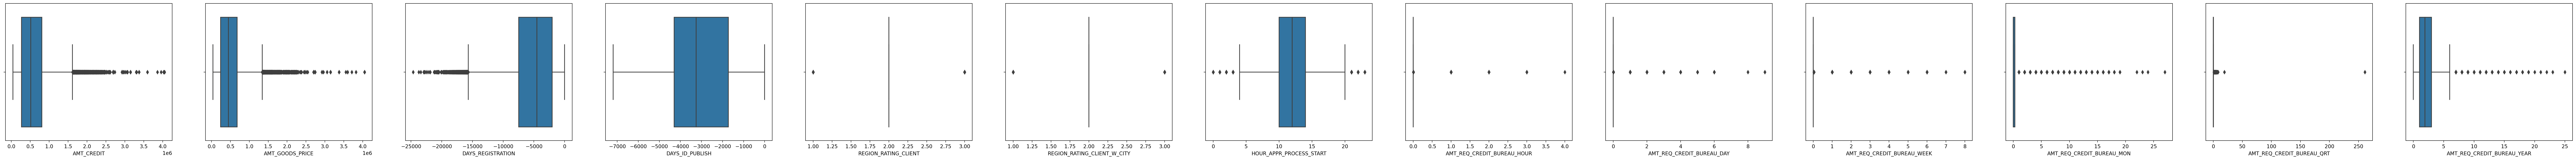

In [33]:
UVA_outliers(df1,loan_related_details)

In [34]:
def UVA_numeric(df1, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = df1[i].min()
    maxi = df1[i].max()
    ran = df1[i].max()-df1[i].min()
    mean = df1[i].mean()
    median = df1[i].median()
    st_dev = df1[i].std()
    skew = df1[i].skew()
    kurt = df1[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(x=df1[i], shade=True)
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "within 1 std_dev")
    sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.title('within 1 std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

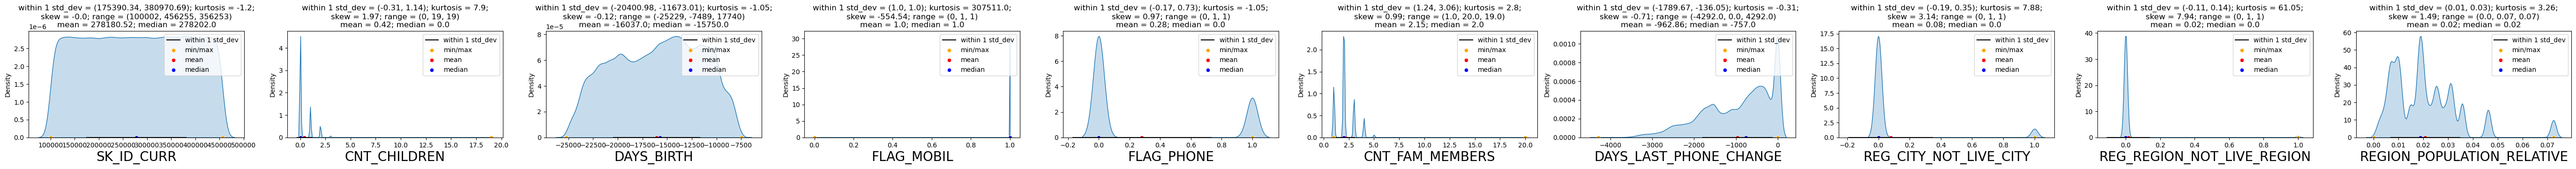

In [35]:
UVA_numeric(df1, customer_personal)

In [36]:
## days_birth have -ve median values due to outliers and -ve skewed 
## days_last_phone_change also having -ve values.

In [37]:
df1.select_dtypes(include=['object']).dtypes

NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
WEEKDAY_APPR_PROCESS_START    object
ORGANIZATION_TYPE             object
dtype: object

In [38]:
## segementing categorical variables into groups
customer_info = ['CODE_GENDER','ORGANIZATION_TYPE','NAME_HOUSING_TYPE','NAME_TYPE_SUITE','NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START']
customer_info2 = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']

In [39]:
def UVA_category(df1, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = df1[i].value_counts(normalize = True)
    n_uni = df1[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(x=norm_count, y=norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

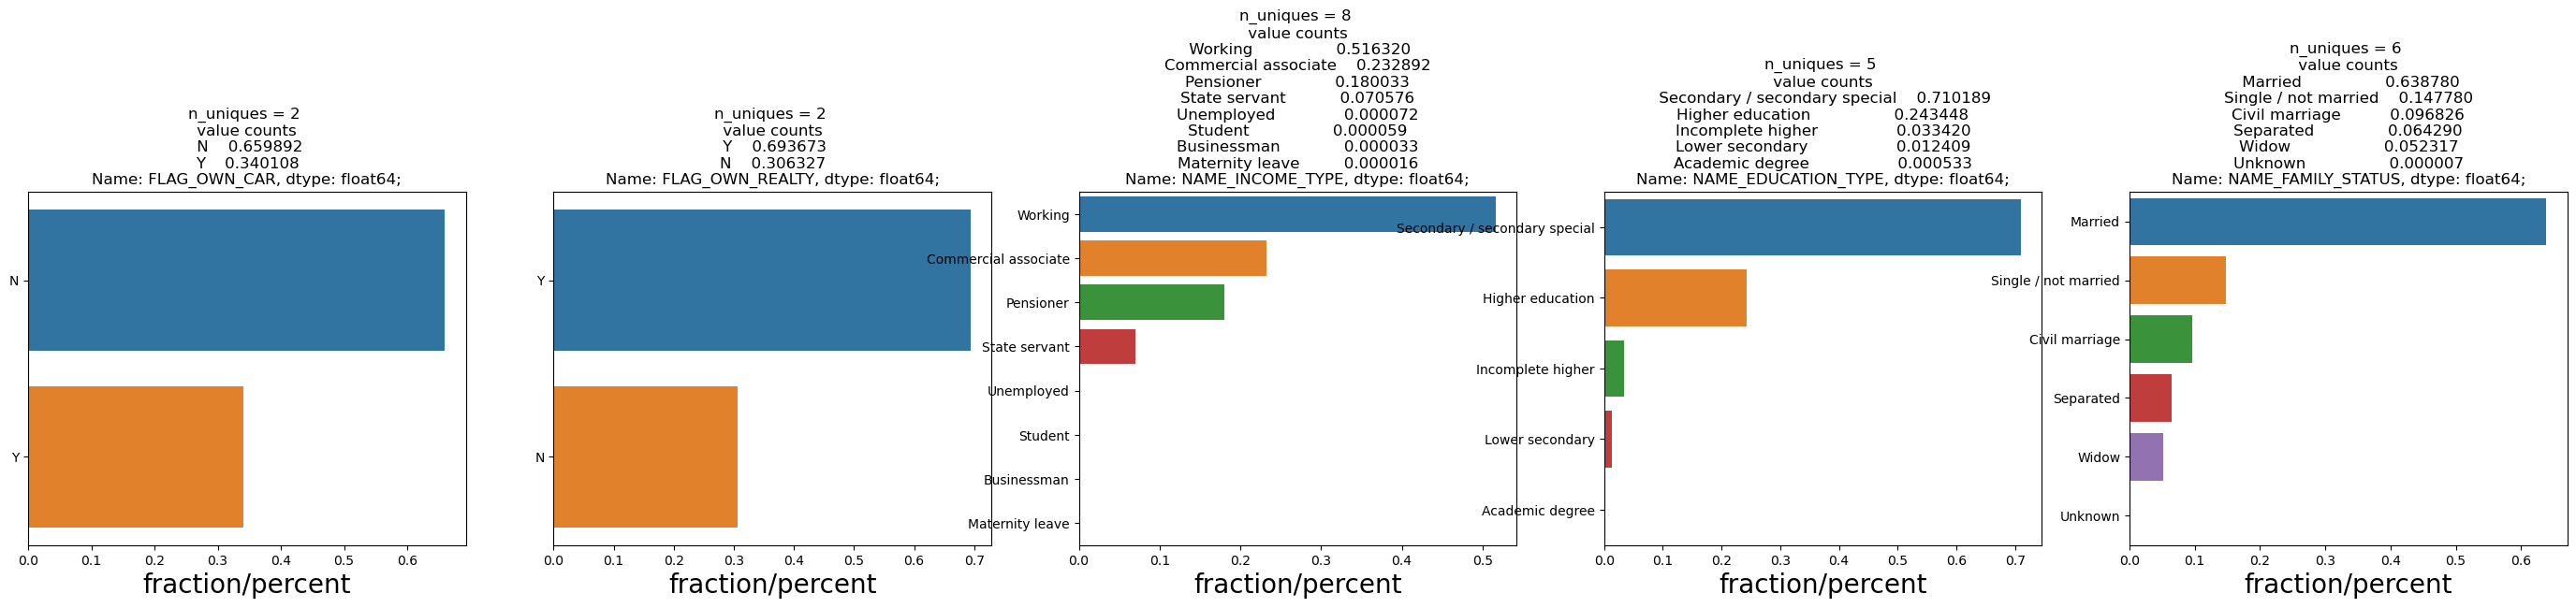

In [40]:
UVA_category(df1,customer_info2)

# Bivariate Analysis 

In [41]:
num = df1.select_dtypes(include=['int64','float64'])[:]
num.dtypes


SK_ID_CURR                       int64
TARGET                           int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY   

In [42]:
from scipy.stats import pearsonr

In [43]:
num.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,-0.001885,-0.001582,0.000067,-8.579928e-04,-2.486236e-03,-2.040093e-03,1.952612e-03,4.516280e-04,9.535961e-04,4.334531e-03
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039628,-0.037227,0.078239,-0.044932,...,0.044395,0.050994,0.032518,5.521848e-02,8.478053e-04,2.464258e-03,7.177650e-04,-1.135579e-02,-1.842386e-03,1.816014e-02
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001826,-0.025573,0.330938,-0.239818,...,0.020072,0.070650,0.069957,-5.865156e-03,-3.827907e-04,-3.417239e-04,-2.276822e-03,-1.010140e-02,-7.323678e-03,-3.883426e-02
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159600,0.074796,0.027261,-0.064223,...,0.003574,0.006431,0.008285,-1.858512e-02,6.909242e-04,2.868087e-03,2.325737e-03,2.406300e-02,4.734061e-03,1.138830e-02
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770127,0.986588,0.099738,-0.055436,-0.066838,...,-0.026886,-0.018856,0.000081,-7.370104e-02,-3.653596e-03,3.963947e-03,-1.192458e-03,5.093388e-02,1.489646e-02,-4.531801e-02
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770127,1.000000,0.774661,0.118424,0.009445,-0.104331,...,-0.006213,0.000896,0.010084,-6.374569e-02,3.565420e-03,2.017909e-03,1.281519e-02,3.614812e-02,9.347827e-03,-1.045214e-02
AMT_GOODS_PRICE,-0.000232,-0.039628,-0.001826,0.159600,0.986588,0.774661,1.000000,0.103482,-0.053416,-0.064826,...,-0.027198,-0.020322,-0.001308,-7.628883e-02,-3.025294e-03,4.374208e-03,-9.399637e-04,5.275511e-02,1.536376e-02,-4.766921e-02
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118424,0.103482,1.000000,-0.029582,-0.003980,...,-0.050499,-0.044057,-0.015188,-4.401317e-02,-2.056316e-03,1.293267e-03,-1.985970e-03,7.265528e-02,-1.182627e-03,9.273629e-04
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053416,-0.029582,1.000000,-0.615864,...,0.180382,0.242401,0.158882,8.293868e-02,4.853826e-03,2.070789e-03,-1.226661e-03,1.259729e-03,-1.083634e-02,-6.610713e-02
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104331,-0.064826,-0.003980,-0.615864,1.000000,...,-0.090516,-0.254559,-0.218101,2.303238e-02,-4.398166e-03,4.387547e-04,2.853353e-03,-3.200336e-02,1.425209e-02,4.642863e-02


<AxesSubplot:>

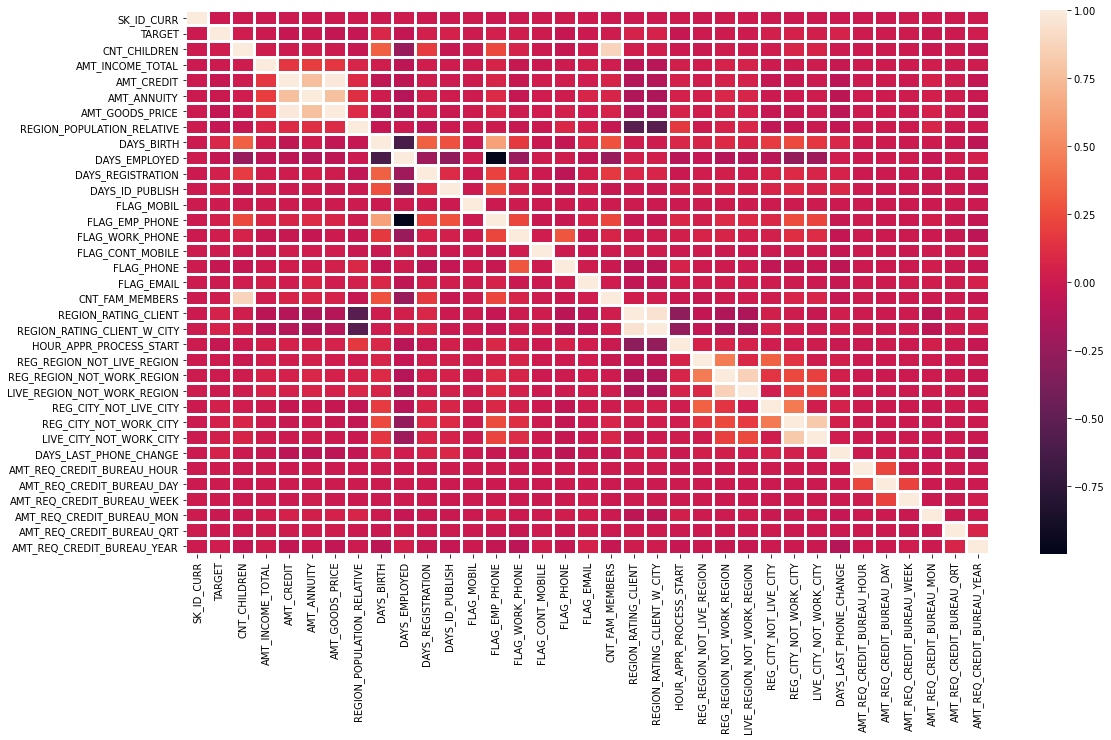

In [44]:
plt.figure(figsize=(18,10))
correlation = num.corr(method='pearson')
sns.heatmap(correlation,linewidth=2)

In [45]:
## segementing the numerical variables 
customer_details =['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
             'REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION',
             'DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
             'FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS']
customer_living_details =['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
                          'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                          'LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                          'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
                          'AMT_REQ_CREDIT_BUREAU_YEAR']

In [46]:
## bivariate continuous categorical analsysis

In [47]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [48]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [49]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.std()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=df1, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=df1)
  plt.title('categorical boxplot')
  

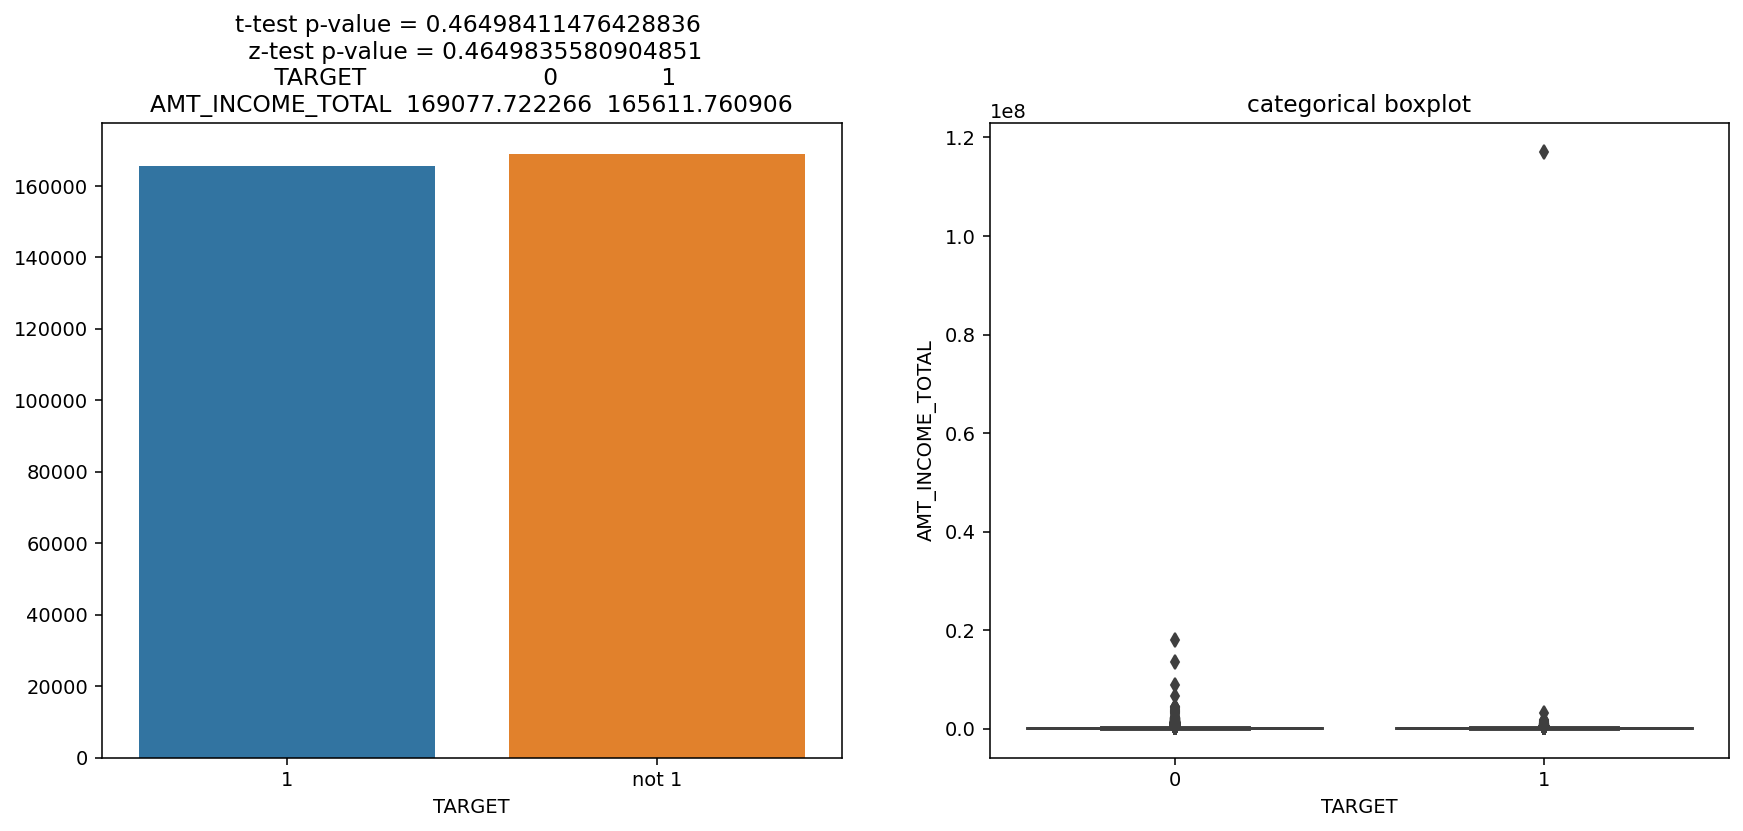

In [50]:
Bivariate_cont_cat(df1, 'AMT_INCOME_TOTAL','TARGET',1)

In [51]:
## Bivariate catgirical categorical analysis

In [52]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])
  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()  


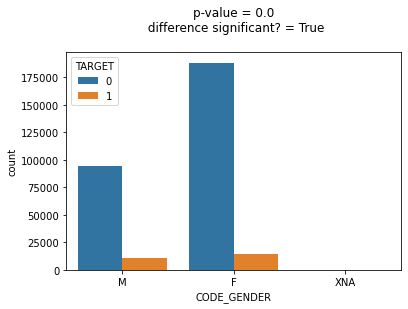

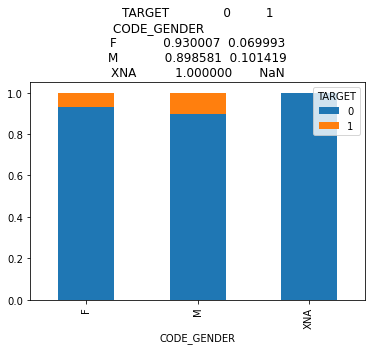

In [53]:
BVA_categorical_plot(df1,'TARGET','CODE_GENDER')

In [54]:
## the difference between males and females with difficulty in repayment(Target=1) is significant, but not much.

In [55]:
c = num.corr().abs()
s = c.unstack()
do = s.sort_values(kind='quicksort', ascending= False)
do = pd.DataFrame(do,columns=['pearson correlation'])

In [56]:
# Top 10 Variables with correlations
do[do['pearson correlation'] <1].head(20)

,,pearson correlation
FLAG_EMP_PHONE,DAYS_EMPLOYED,0.999755
DAYS_EMPLOYED,FLAG_EMP_PHONE,0.999755
AMT_CREDIT,AMT_GOODS_PRICE,0.986588
AMT_GOODS_PRICE,AMT_CREDIT,0.986588
REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950842
REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950842
CNT_CHILDREN,CNT_FAM_MEMBERS,0.879160
CNT_FAM_MEMBERS,CNT_CHILDREN,0.879160
LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.860627
REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,0.860627


In [57]:
# top 10 variables highly corelated with target variable
df4 = df1[df1.columns[1:]].corr()['TARGET'][:]
df5=df4.sort_values(ascending=False)
df5.head(11)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
DAYS_REGISTRATION              0.041975
LIVE_CITY_NOT_WORK_CITY        0.032518
Name: TARGET, dtype: float64